In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spam.tsv',sep = '\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.info() # There are 4 columns and 5572 rows and all the columns are non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [5]:
df.describe() 

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [6]:
df['label'].value_counts()  # The target columns is imbalanced, hence randomly selecting the ham messages equal to spam

label
ham     4825
spam     747
Name: count, dtype: int64

In [7]:
ham = df[df['label']=='ham']
spam = df[df['label']== 'spam']

In [8]:
ham.shape,spam.shape

((4825, 4), (747, 4))

In [9]:
# Randomly selecting the ham messages

ham = ham.sample(spam.shape[0])

In [10]:
ham.shape, spam.shape 

((747, 4), (747, 4))

In [11]:
data = pd.concat([ham,spam],axis=0, ignore_index=True)

In [12]:
data.head()

,label,message,length,punct
0,ham,O was not into fps then.,24,1
1,ham,"Babe, have you got enough money to pick up bre...",105,4
2,ham,X course it 2yrs. Just so her messages on mess...,72,1
3,ham,S.i'm watching it in live..,27,4
4,ham,I dont understand your message.,31,1


In [13]:
data.shape

(1494, 4)

(array([ 1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  3.,  0.,  1.,  1.,
         2.,  1.,  1.,  4.,  4.,  2.,  0.,  0.,  1.,  0.,  1.,  3.,  1.,
         4.,  4.,  6.,  3.,  2.,  0.,  6.,  2.,  3.,  0.,  5.,  0.,  1.,
         5.,  4.,  9.,  2.,  4.,  9.,  6.,  6.,  3., 10.,  1., 11., 10.,
         5., 10.,  3., 10., 13., 14., 27., 18., 23., 25., 27., 32., 32.,
        18., 49., 58., 68., 76., 65.,  6.,  8.,  1.,  2.,  2.,  2.,  2.,
         1.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 13. ,  15.1,  17.2,  19.3,  21.4,  23.5,  25.6,  27.7,  29.8,
         31.9,  34. ,  36.1,  38.2,  40.3,  42.4,  44.5,  46.6,  48.7,
         50.8,  52.9,  55. ,  57.1,  59.2,  61.3,  63.4,  65.5,  67.6,
         69.7,  71.8,  73.9,  76. ,  78.1,  80.2,  82.3,  84.4,  86.5,
         88.6,  90.7,  92.8,  94.9,  97. ,  99.1, 101.2, 103.3, 105.4,
        107.5, 109.6, 111.7, 113.8, 115.9, 118. , 120.1, 122.2, 124.3,
        

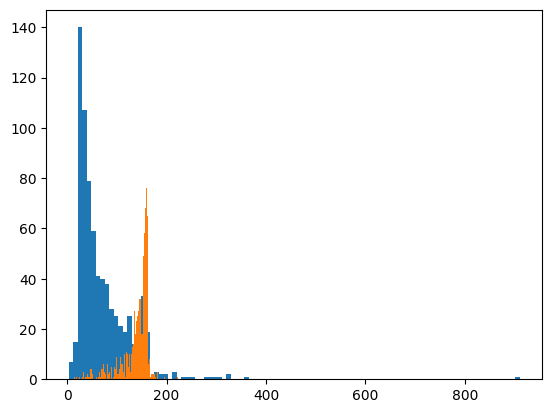

In [14]:
plt.hist(data[data['label']=='ham']['length'],bins=100)
plt.hist(data[data['label']=='spam']['length'],bins=100)

(array([ 23.,   0.,   0.,  26.,   0.,   0.,   0.,  73.,   0.,   0.,   0.,
        115.,   0.,   0.,   0.,  77.,   0.,   0.,   0.,  67.,   0.,   0.,
          0.,  86.,   0.,   0.,  74.,   0.,   0.,   0.,  66.,   0.,   0.,
          0.,  49.,   0.,   0.,   0.,  27.,   0.,   0.,   0.,  17.,   0.,
          0.,   0.,  22.,   0.,   0.,   0.,  14.,   0.,   0.,   2.,   0.,
          0.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 0.  ,  0.26,  0.52,  0.78,  1.04,  1.3 ,  1.56,  1.82,  2.08,
         2.34,  2.6 ,  2.86,  3.12,  3.38,  3.64,  3.9 ,  4.16,  4.42,
         4.68,  4.94,  5.2 ,  5.46,  5.72,  5.98,  6.24,  6.5 ,  6.76,
         7.02,  7.28,  7.54,  7.8 ,  8.06,  8.32,  8.58,  8.84,  9.1 ,
         9.36,  9.62,  9.88, 10.14

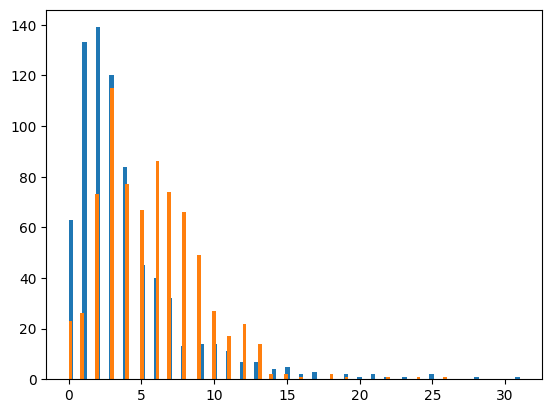

In [15]:
plt.hist(data[data['label']=='ham']['punct'],bins=100)
plt.hist(data[data['label']=='spam']['punct'],bins=100)

### Splitting the data set

In [16]:
X = data['message']
y = data['label']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, shuffle=True)

### Vectorization

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

## Model Building

### 1)Random Forest Classifier 

In [22]:
classifier = Pipeline([('tfidf',TfidfVectorizer()),('classifier',RandomForestClassifier(n_estimators=100))])

In [23]:
classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

##### Prediction on Test data

In [25]:
y_pred = classifier.predict(X_test)

##### Model Evaluation 

In [26]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [33]:
print("-----------------------------------------")
print('\t',"RANDOM fOREST CLASSIFIER")
print("-----------------------------------------")
print("Classification report:",'\n',classification_report(y_test,y_pred),"\n")
print("The accuracy score is:", accuracy_score(y_test,y_pred),"\n")
print("confusion_matrix:",'\n\n',confusion_matrix(y_test,y_pred))

-----------------------------------------
	 RANDOM fOREST CLASSIFIER
-----------------------------------------
Classification report: 
               precision    recall  f1-score   support

         ham       0.90      0.99      0.95       217
        spam       0.99      0.90      0.94       232

    accuracy                           0.94       449
   macro avg       0.95      0.95      0.94       449
weighted avg       0.95      0.94      0.94       449
 

The accuracy score is: 0.9443207126948775 

confusion_matrix: 

 [[215   2]
 [ 23 209]]


## 2) SVC

In [34]:
from sklearn.svm import SVC

In [35]:
svm = Pipeline([('tfidf',TfidfVectorizer()),('classifier',SVC(kernel='linear',C=100,gamma='auto'))])

In [36]:
svm.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto', kernel='linear'))])

In [38]:
pred = svm.predict(X_test)

In [40]:
print("-----------------------------------------")
print("SUPPORT VECTOR MACHINE CLASSIFIER")
print("-----------------------------------------")
print("Classification report:",'\n',classification_report(y_test,pred),"\n")
print("The accuracy score is:", accuracy_score(y_test,pred),"\n")
print("confusion_matrix:",'\n\n',confusion_matrix(y_test,pred))

-----------------------------------------
SUPPORT VECTOR MACHINE CLASSIFIER
-----------------------------------------
Classification report: 
               precision    recall  f1-score   support

         ham       0.93      0.98      0.95       217
        spam       0.98      0.93      0.95       232

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449
 

The accuracy score is: 0.9510022271714922 

confusion_matrix: 

 [[212   5]
 [ 17 215]]


##### From the above evaluation metrics it is clear the SVC model has good accuracy score.

## Testing the model on custom messages

In [50]:
test1 = ['Hello, You are learning natural Language Processing']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']

In [51]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']


# Saving the model

In [44]:
import pickle
with open('text_model.pkl','wb') as file:
    pickle.dump(svm,file)